### **Estatísticas PETR4 e PTR3 - Medidas de Posição e Dispersão**

#### **Extração e tratamento de dados**

In [1]:
import plotly.graph_objects as go
from scipy.stats import poisson
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import vectorbt as vbt
import yfinance as yf
import sweetviz as sv
import seaborn as sns
import pandas as pd
import numpy as np
import pylab

In [2]:
petr = yf.download('PETR4.SA')['Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
petr.index = pd.to_datetime(petr.index)

Gerada uma Pandas Series apenas da coluna "Close", extraída acima.

In [4]:
petr.head()

Date
2000-01-03    5.875
2000-01-04    5.550
2000-01-05    5.494
2000-01-06    5.475
2000-01-07    5.500
Name: Close, dtype: float64

#### **Modelando retornos diários**

In [5]:
retornos_petr = petr.pct_change()

In [6]:
retornos_petr.dropna(inplace = True)

In [7]:
retornos_petr

Date
2000-01-04   -0.055319
2000-01-05   -0.010090
2000-01-06   -0.003458
2000-01-07    0.004566
2000-01-10    0.020545
                ...   
2024-07-12   -0.004696
2024-07-15    0.009174
2024-07-16   -0.002597
2024-07-17    0.005208
2024-07-18   -0.004663
Name: Close, Length: 6163, dtype: float64

Calculando a média dos retornos diários

In [8]:
media_retornos = np.mean(retornos_petr)

Histogram plot

Este histograma nos mostra que a maioria dos retornos diários de PETR4 estão concentrados em torno do valor médio, com algumas exceções.  
A linha vermelha sólida representa a média dos retornos, enquanto a linha tracejada indica a mediana.  
A simetria e a dispersão dos dados podem ser visualizadas claramente através desta representação gráfica.  
Aplique zoom para uma visualização mais detalhada.

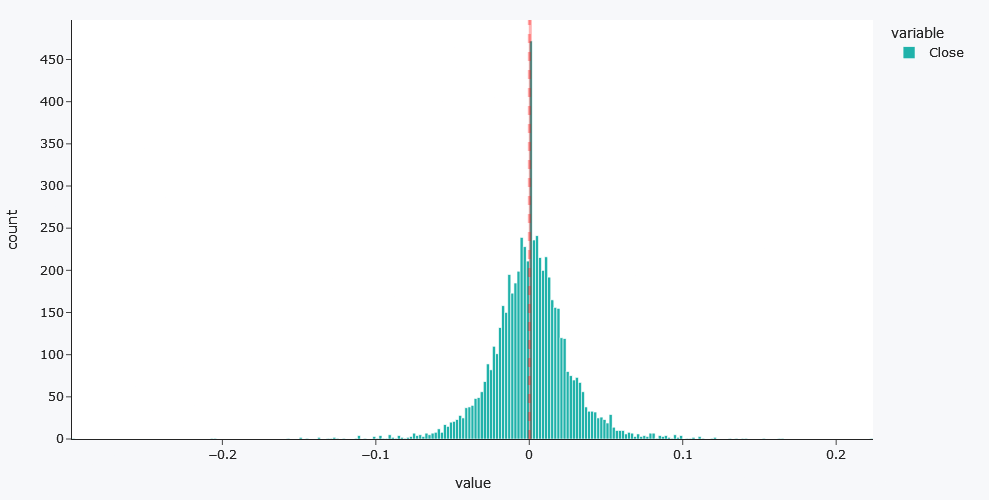

In [9]:
fig01 = px.histogram(retornos_petr, color_discrete_sequence=['lightseagreen'])

fig01.add_vline(x=np.mean(retornos_petr), line_width=3,  line_color="red")
fig01.add_vline(x=np.median(retornos_petr), line_width=3, line_dash="dash", line_color="red")

fig01.update_layout(width=1170, height=500, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=True)

Q-Q plot

Este gráfico baseado nos dados extraídos nos mostra a proximidade dos retornos diários de PETR4 com uma distribuição normal.  
Os pontos ao longo da linha reta indicam que os dados seguem aproximadamente a normalidade, mas outliers podem ser observados nas caudas.

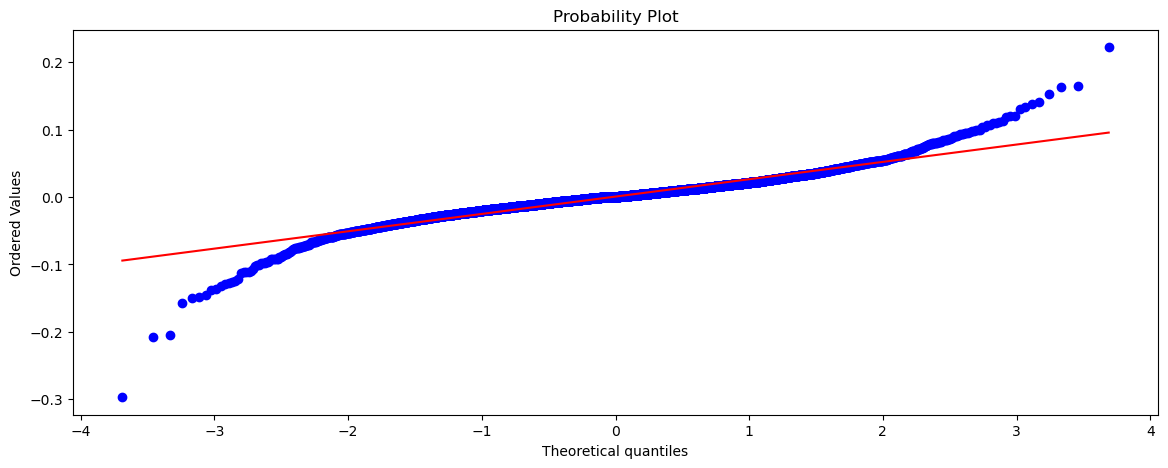

In [10]:
plt.figure(figsize=(14, 5))
stats.probplot(retornos_petr, dist="norm", plot=pylab)
pylab.show()

#### **Dividendos e Dividend Yeld em PETR4**

Problema:  
Um investidor está interessado em ações que ofereçam bom rendimento por meio de dividendos.  
Ele precisa avaliar o histórico de dividendos pagos e o dividend yield (DY) da ação PETR4 para determinar se essa é uma boa opção de investimento.  

Solução:  
Ao calcular o DY da ação PETR4 ao longo do tempo, o investidor ou analista pode verificar se o rendimento por dividendos é atrativo e se há uma relação entre o preço da ação e o DY.  
Essa análise ajuda a identificar oportunidades de investimento em ações com bom potencial de retorno por meio de dividendos.

Dividendos

In [11]:
dividendos_petr4 = vbt.YFData.download('PETR4.SA').get(['Close', 'Dividends'])

In [12]:
dividendos_petr4.head()

,Close,Dividends
Date,,
2000-01-03 02:00:00+00:00,1.402440,0.0
2000-01-04 02:00:00+00:00,1.324858,0.0
2000-01-05 02:00:00+00:00,1.311490,0.0
2000-01-06 02:00:00+00:00,1.306954,0.0
2000-01-07 02:00:00+00:00,1.312922,0.0


In [13]:
dividendos_petr4.index = dividendos_petr4.index.strftime('%Y-%m-%d')

In [14]:
dividendos_petr4.index = pd.to_datetime(dividendos_petr4.index)

In [15]:
dividendos_petr4.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18'],
              dtype='datetime64[ns]', name='Date', length=6164, freq=None)

In [16]:
dividendos_petr4.head()

,Close,Dividends
Date,,
2000-01-03,1.402440,0.0
2000-01-04,1.324858,0.0
2000-01-05,1.311490,0.0
2000-01-06,1.306954,0.0
2000-01-07,1.312922,0.0


Calculando o Dividend Yield

In [17]:
dividendos_petr4['soma_dividendos'] = dividendos_petr4.Dividends.rolling('365D').sum()

C:\Users\LCM\AppData\Local\Temp\ipykernel_272\3126120492.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Corrigindo o warning

In [18]:
dividendos_petr4.loc[:, 'soma_dividendos'] = dividendos_petr4.Dividends.rolling('365D').sum()

In [19]:
dividendos_petr4.tail()

,Close,Dividends,soma_dividendos
Date,,,
2024-07-12,38.150002,0.0,6.48984
2024-07-15,38.500000,0.0,6.48984
2024-07-16,38.400002,0.0,6.48984
2024-07-17,38.599998,0.0,6.48984
2024-07-18,38.419998,0.0,6.48984


Gerando o gráfico para os dividendos

Este gráfico dos dividendos nos mostra que os pagamentos de dividendos por PETR4 variam ao longo do tempo.  
Observamos períodos de maior e menor pagamento, o que reflete a política de dividendos da empresa e as condições do mercado.

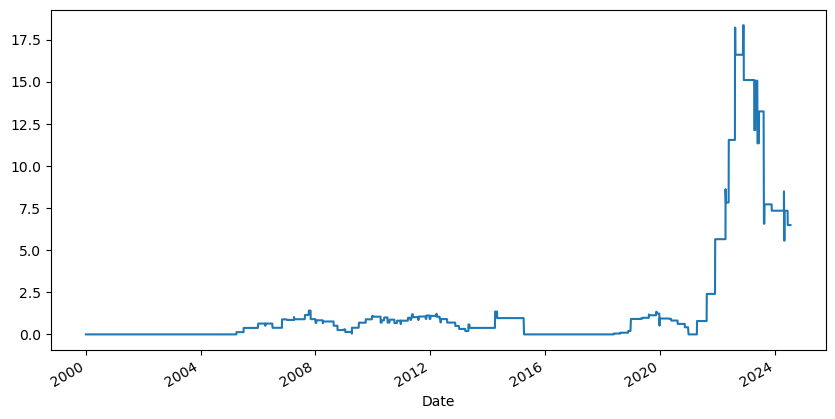

In [20]:
plt.figure(figsize=(10, 5))
dividendos_petr4.soma_dividendos.plot();

Dividend Yeld

Cálculo dos dividendos com janelas de 01 ano, somando os dividendos pagos ao longo do ano e divididos pelo preço da ação no dia específico:


In [21]:
dividendos_petr4['DY'] = dividendos_petr4['soma_dividendos']/dividendos_petr4.Close * 100

In [22]:
dividendos_petr4

,Close,Dividends,soma_dividendos,DY
Date,,,,
2000-01-03,1.402440,0.0,0.00000,0.000000
2000-01-04,1.324858,0.0,0.00000,0.000000
2000-01-05,1.311490,0.0,0.00000,0.000000
2000-01-06,1.306954,0.0,0.00000,0.000000
2000-01-07,1.312922,0.0,0.00000,0.000000
...,...,...,...,...
2024-07-12,38.150002,0.0,6.48984,17.011375
2024-07-15,38.500000,0.0,6.48984,16.856727
2024-07-16,38.400002,0.0,6.48984,16.900624


Para evitar grandes distorções, foram removidos os dias onde não houveram pagamentos de dividendos

In [23]:
dy_petr4 = dividendos_petr4[dividendos_petr4['Dividends']!=0]

In [24]:
dy_petr4.head()

,Close,Dividends,soma_dividendos,DY
Date,,,,
2005-04-01,3.132671,0.133288,0.133288,4.254772
2005-07-01,3.324142,0.250663,0.383951,11.550380
2006-01-02,4.747353,0.259000,0.642951,13.543358
2006-04-04,5.428013,0.132700,0.642363,11.834219
2006-11-01,5.449281,0.500750,0.892450,16.377391


Estes dois gráficos para 'dividend yield' nos mostram a relação entre os dividendos pagos e o preço das ações de PETR4 ao longo do tempo.  
O primeiro gráfico representa os valores absolutos dos dividendos, enquanto o segundo mostra o yield, que é uma medida da eficiência dos dividendos em relação ao preço da ação.

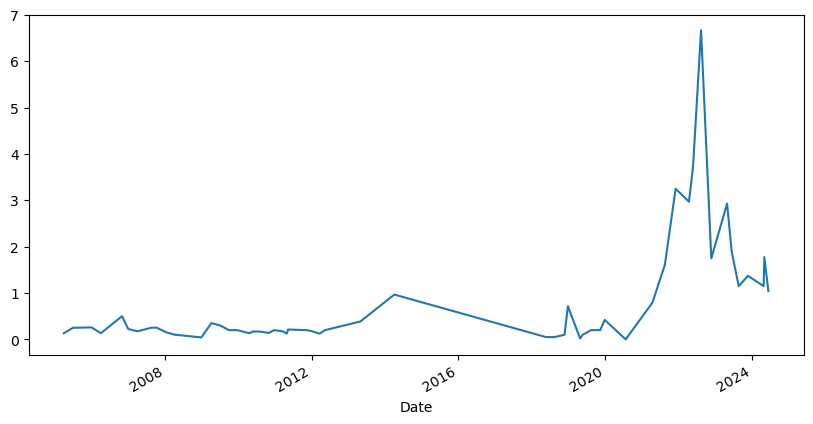

In [25]:
plt.figure(figsize=(10, 5))
dy_petr4.Dividends.plot();

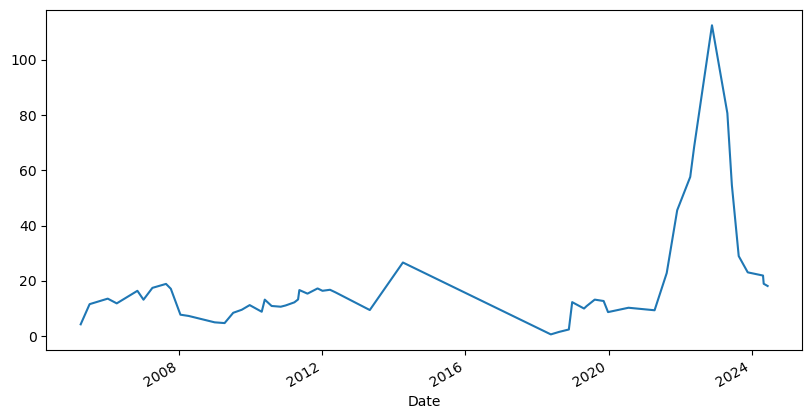

In [26]:
plt.figure(figsize=(9.75, 5))
dy_petr4.DY.plot();

In [27]:
np.mean(dy_petr4.DY)

20.452528159988073

In [28]:
np.median(dy_petr4.DY)

13.18751045322485

Este histograma nos mostra a distribuição do dividend yield de PETR4.  
Podemos observar a densidade dos dividend yields, com a linha de densidade ajustada indicando a tendência central e a dispersão dos valores.

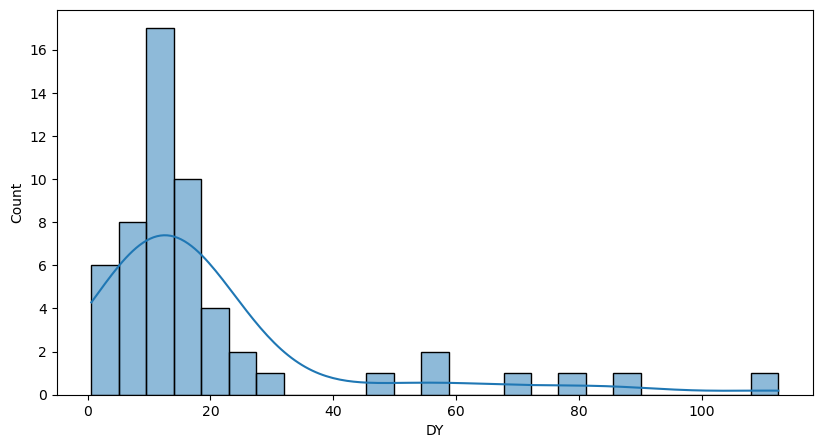

In [29]:
plt.figure(figsize=(9.75, 5))
sns.histplot(dy_petr4.DY, kde=True)
plt.show()

Este plot de quantis (Q-Q Plot) nos mostra que este resultado está longe de ser uma distribuição normal.  
Podemos ver que os pontos se desviam significativamente da linha reta, especialmente nas caudas, indicando a presença de outliers ou distribuições assimétricas.

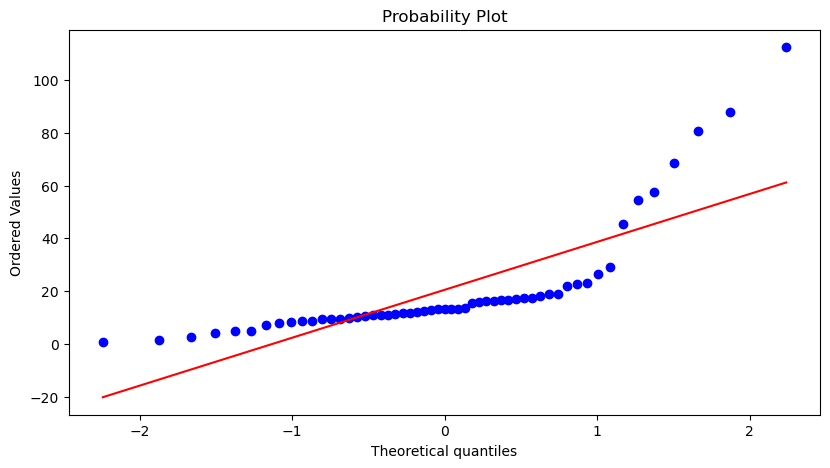

In [30]:
plt.figure(figsize=(9.7, 5))
stats.probplot(dy_petr4.DY, dist="norm", plot=pylab)
pylab.show()

Dividend Yield de PETR4 foi maior nos períodos onde o preço da ação estava maior?

Este scatterplot nos permite observar a relação entre o preço das ações de PETR4 e o dividend yield.  
A análise do gráfico pode revelar se há uma correlação visível entre os dois, ajudando a entender se períodos de preços mais altos das ações correspondem a um dividend yield mais alto ou não.

In [31]:
fig02 = px.scatter(x=dy_petr4.Close, y=dy_petr4.DY, width=500)

fig02.update_layout(width=830, height=500, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False, xaxis_title='<b>Preço PETR4 (R$)', yaxis_title='<b>DY PETR4 (%)')

fig02.show()

Visto que não temos como chegar a esta conclusão com o resultado acima, pois temos uma relação que nos parece ambígua: um acumulado no canto inferior esquerdo de alguns pontos agrupados e, apesar da tendência linear, precisamos fazer o teste de correlação.

#### **Testes de correlação**

Problema:  
Um analista financeiro precisa avaliar a relação entre o preço da ação PETR4 e o dividend yield (DY) para entender se há uma correlação significativa entre esses dois fatores.  

Solução:  
O código apresentado realiza dois testes de correlação: Pearson e Spearman. O teste de correlação de Pearson é sensível a outliers e assume uma distribuição normal, enquanto o teste de correlação de Spearman é não-paramétrico e não assume distribuição normal, sendo mais apropriado para dados financeiros que podem apresentar distorções.

Correlação de Pearson (sensível à outliers)

In [32]:
corr_pearson, p_pearson = stats.pearsonr(dy_petr4.Close, dy_petr4.DY)
print(f'Correlação de Pearson: r={corr_pearson:.3f}, p-valor={p_pearson:.3f}')

Correlação de Pearson: r=0.378, p-valor=0.004


Correlação de Spearman

 Mais apropriada para distorções do mercado financeiro, a Correlação de Spearman é não-paramétrica e não assume distribuição normal

In [33]:
corr_spearman, p_spearman = stats.spearmanr(dy_petr4.Close, dy_petr4.DY)
print(f'Correlação de Spearman: r={corr_spearman:.3f}, p-valor={p_spearman:.3f}')

Correlação de Spearman: r=0.318, p-valor=0.018


#### **Arbitragem em ações**

Problema:  
Um trader detecta que a ação PETR4 está subvalorizada em relação à PETR3 e decide comprar a PETR4 e vender a PETR3, esperando que o preço da PETR4 suba e o preço da PETR3 baixe, permitindo que ele venda a PETR4 e compre a PETR3 novamente, obtendo lucro.  

Solução:  
Ao calcular o spread e as bandas de confiança, o trader pode identificar oportunidades de arbitragem e tomar decisões de compra e venda mais informadas.

Extraindo os dados de PETR3 e PETR4 para calcular o spread

In [34]:
petr3 = yf.download('PETR3.SA')['Close']
petr4 = yf.download('PETR4.SA')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
spread = pd.DataFrame({'PETR3.SA': petr3, 'PETR4.SA': petr4})

In [36]:
spread.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18'],
              dtype='datetime64[ns]', name='Date', length=6164, freq=None)

Fazendo o cálculo da razão entre PETR4 e PETR3, com 3 casas decimais, para obter granularidade

In [37]:
spread["ratio"] = round(spread['PETR4.SA'] / spread['PETR3.SA'], 3)

In [38]:
spread.head()

,PETR3.SA,PETR4.SA,ratio
Date,,,
2000-01-03,4.593750,5.875,1.279
2000-01-04,4.335937,5.550,1.280
2000-01-05,4.394531,5.494,1.250
2000-01-06,4.359375,5.475,1.256
2000-01-07,4.394531,5.500,1.252


<Axes: xlabel='Date'>

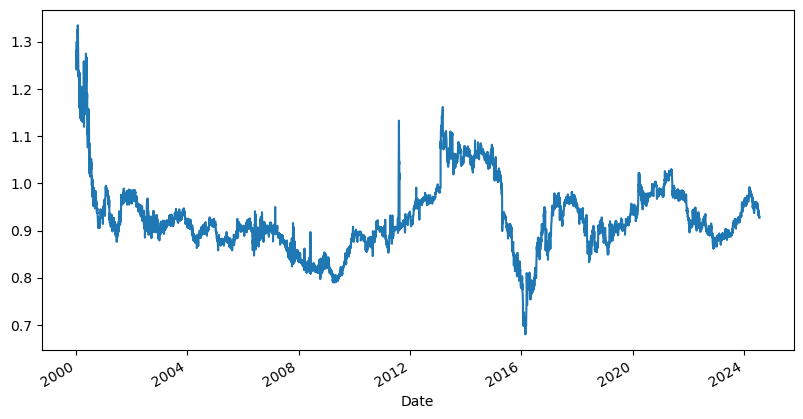

In [39]:
plt.figure(figsize=(9.7, 5))
spread.ratio.plot()

In [40]:
media_spread = round(np.mean(spread.ratio), 3)
sd1_min_spread = media_spread - round(np.std(spread.ratio), 3)
sd1_max_spread = media_spread + round(np.std(spread.ratio), 3)
sd2_min_spread = media_spread - (2 * round(np.std(spread.ratio), 3))
sd2_max_spread = media_spread + (2 * round(np.std(spread.ratio), 3))

A análise do spread entre PETR4 e PETR3 nos permite identificar oportunidades de arbitragem.  
Comparando os preços das duas ações, podemos encontrar momentos em que uma está subvalorizada ou sobrevalorizada em relação à outra, possibilitando operações de compra e venda simultâneas para obter lucro.

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread.index, y=spread.ratio))
fig.add_hline(y=media_spread, line_width=5, line_color="green")
fig.add_hline(y=sd1_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd1_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=sd2_min_spread, line_width=5, line_dash="dash", line_color="red")
fig.add_hline(y=sd2_max_spread, line_width=5, line_dash="dash", line_color="red")

fig.update_layout(
    title='Razão entre preço PETR4 e PETR3 (2010 e mar/2022)',
    title_x=0.5,
    xaxis_title='Data',
    yaxis_title='Ratio',
    font=dict(size=14),
    width=1500, height=700
)

fig.show()

#### **Métricas móveis (médias móveis)**

Problema:  
Um analista técnico precisa acompanhar o comportamento da ação PETR4 e identificar possíveis tendências de mercado. Ele deseja utilizar a média móvel como uma ferramenta de análise.  

Solução:  
O código apresenta o cálculo e a visualização da média móvel de 20 períodos para a ação PETR4. Essa métrica pode ser usada para identificar tendências de alta (quando o preço está acima da média móvel) ou de baixa (quando o preço está abaixo da média móvel), auxiliando o analista na tomada de decisões de compra e venda.

Extraindo dados de PETR3 e PETR4 para calcular o spread

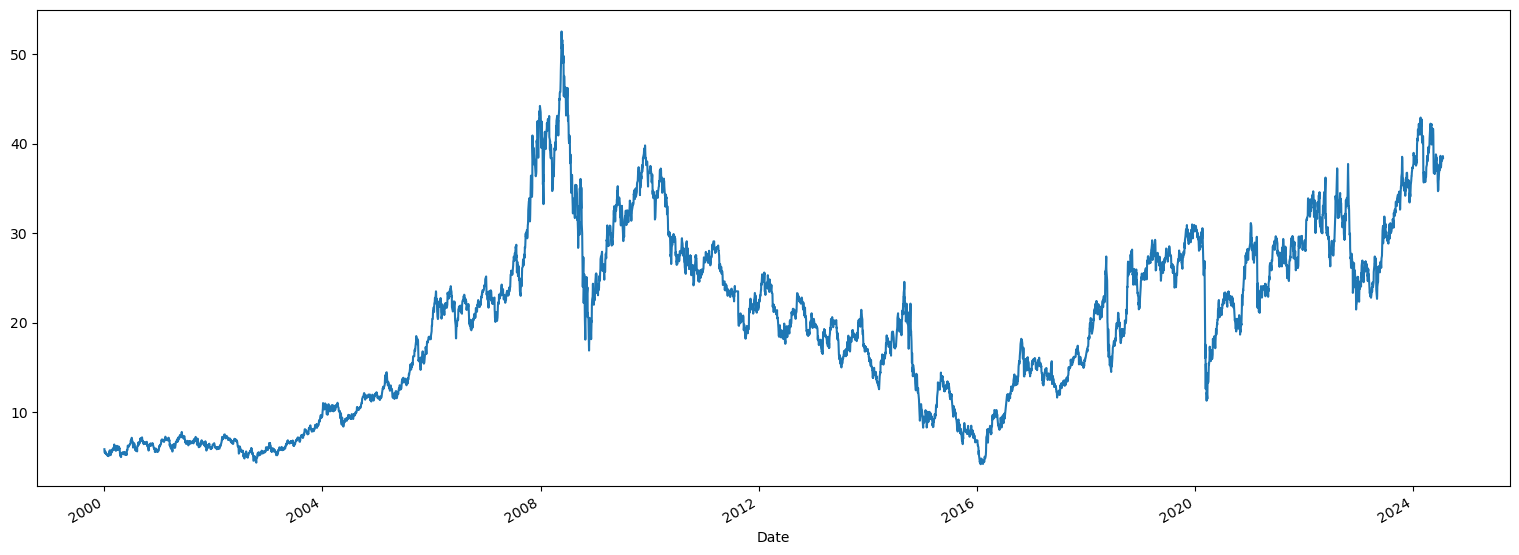

In [42]:
spread['PETR4.SA'].plot(figsize=(19, 7));

Adicionando a coluna 'Média Móvel de 20 dias' no DataFrame

In [43]:
spread['MM_20'] = spread['PETR4.SA'].rolling(20).mean()

In [44]:
spread.head(20)

,PETR3.SA,PETR4.SA,ratio,MM_20
Date,,,,
2000-01-03,4.593750,5.875,1.279,NaN
2000-01-04,4.335937,5.550,1.280,NaN
2000-01-05,4.394531,5.494,1.250,NaN
2000-01-06,4.359375,5.475,1.256,NaN
2000-01-07,4.394531,5.500,1.252,NaN
2000-01-10,4.523437,5.613,1.241,NaN
2000-01-11,4.371093,5.475,1.253,NaN
2000-01-12,4.218750,5.483,1.300,NaN
2000-01-13,4.218750,5.325,1.262,NaN


Gráfico interativo com a biblioteca Plotly

O gráfico estático oferece uma visão instantânea e mais simples das médias móveis, enquanto o gráfico interativo permite explorar os dados em mais detalhes, como identificar pontos específicos no tempo.  
A interação pode ser útil para uma análise mais aprofundada e para destacar padrões que podem não ser imediatamente visíveis no gráfico estático.

In [45]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=spread.index, y=spread["PETR4.SA"], name = 'Cotação de PETR4'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["MM_20"], name = 'Média Móvel de 20 períodos'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20),
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=1500,height=700)

fig.show()

#### **Z Score**

Problema:  
O gestor de fundos observa que o preço da ação PETR4 está 2 desvios padrão acima da sua média móvel de 20 períodos. Isso significa que o preço está em um nível considerado de "sobrecompra" em relação à sua volatilidade histórica.  

Solução:  
Ao calcular o Z Score, o gestor pode identificar que o preço da ação PETR4 está fora dos limites de confiança de 95%, indicando um possível nível de sobrecompra. Essa informação pode levá-lo a rebalancear a posição da ação em sua carteira, reduzindo o risco associado a essa posição.

Calculando a Banda de Bollinger e Intervalo de Confiança de 95%

A tabela Z, também conhecida como tabela normal padrão, fornece a área abaixo da curva à esquerda do Z-score.  
A área representa a probabilidade que os valores de Z cairão dentro de uma região da distribuição normal padrão.

Referências

https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4h/4h_2content_11.html



Verificando a tabela "Z-Score" obtemos os valores de '1.9' e '0.06'  
Calcular as bandas inferior e superior com a média móvel e desvio padrão 

In [46]:
spread['IC_95_mm_lower'] = spread['PETR4.SA'].rolling(window=20).mean() - 1.96 * spread['PETR4.SA'].rolling(window=20).std()
spread['IC_95_mm_upper'] = spread['PETR4.SA'].rolling(window=20).mean() + 1.96  *spread['PETR4.SA'].rolling(window=20).std()

In [47]:
spread.head()

,PETR3.SA,PETR4.SA,ratio,MM_20,IC_95_mm_lower,IC_95_mm_upper
Date,,,,,,
2000-01-03,4.593750,5.875,1.279,NaN,NaN,NaN
2000-01-04,4.335937,5.550,1.280,NaN,NaN,NaN
2000-01-05,4.394531,5.494,1.250,NaN,NaN,NaN
2000-01-06,4.359375,5.475,1.256,NaN,NaN,NaN
2000-01-07,4.394531,5.500,1.252,NaN,NaN,NaN


As Bandas de Bollinger nos ajudam a identificar as flutuações, volatilidade da ação, níveis de sobrecompra e sobrevenda.  
Enquanto o Z Score nos permite medir a distância dos preços em relação à média, em termos de desvios padrão.

In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=spread.index, y=spread["PETR4.SA"], name = 'Cotação de PETR4'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["MM_20"], name = 'Média Móvel de 20 períodos'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["IC_95_mm_lower"], name = 'Banda Inferior'))
fig.add_trace(go.Scatter(x=spread.index, y=spread["IC_95_mm_upper"], name = 'Banda Superior'))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20),
                  template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=1500,height=700)

fig.show()

#### **Distribuição de Poisson**

Problema:  
Um gestor de um fundo de investimento em ações precisa entender a probabilidade de ocorrência de diferentes números de retornos positivos da ação PETR4 em sua carteira.  

Solução:  
O código apresentado ajusta a distribuição de Poisson aos retornos positivos da ação PETR4. A distribuição de Poisson é adequada para modelar eventos discretos e independentes que ocorrem em um intervalo de tempo, como o número de retornos positivos em um determinado período.

Filtrando retornos positivos

In [49]:
retornos_positivos = retornos_petr[retornos_petr > 0]

Calculando lambda para a distribuição de Poisson (média dos retornos positivos)

In [50]:
lambda_poisson = retornos_positivos.mean()

Definindo o intervalo de valores

In [51]:
x = np.arange(0, 20)
pmf = poisson.pmf(x, lambda_poisson)

Plotando a Distribuição de Poisson

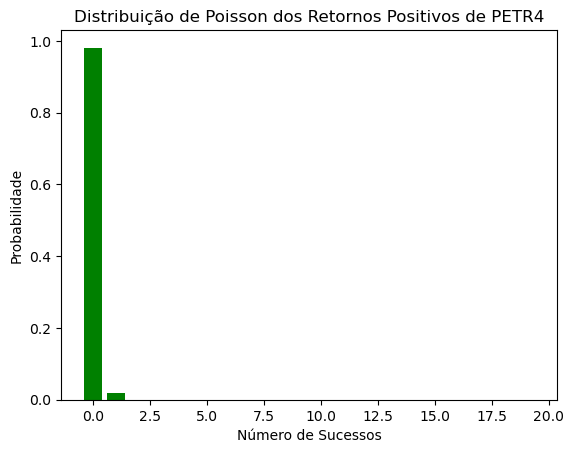

In [52]:
plt.bar(x, pmf, color='green')
plt.title('Distribuição de Poisson dos Retornos Positivos de PETR4')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.show()

Este gráfico nos mostra a distribuição de Poisson dos retornos positivos de PETR4.  
A análise da distribuição de Poisson pode nos ajudar a entender a frequência de retornos positivos em diferentes intervalos de tempo.  
Foi feito o cálculo de lambda como a média dos retornos positivos e observamos como essa distribuição modela a probabilidade de diferentes números de sucessos.  


Incluir a distribuição correta pode aumentar muito a acurácia dos modelos

Atenção especial à variável resposta: é contínua ou discreta?  
Neste caso estamos lidando com uma variável resposta discreta, que conta o número de retornos positivos em um intervalo de tempo, o que justifica o uso da Distribuição de Poisson para modelar esses dados.

#### **Assimetria e curtose**

Problema:   
O gestor de fundos observa que a ação PETR4 apresenta uma assimetria negativa e uma curtose muito alta em relação à distribuição normal. Ele precisa entender as implicações desses resultados para a gestão do risco em sua carteira.  

Solução:  
Ao analisar a assimetria e curtose dos retornos diários da ação PETR4, o gestor de fundos pode concluir que a ação apresenta um risco potencialmente maior do que uma distribuição normal. A assimetria negativa indica uma maior probabilidade de perdas acentuadas, enquanto a curtose elevada sugere a presença de outliers extremos, tanto positivos quanto negativos.

Assimetria (skewness)

In [53]:
stats.skew(retornos_petr)

-0.2818985958632932

O resultado da assimetria negativa acima representa termos retornos diários normalmente maiores.

A assimetria (skewness) dos retornos diários de PETR4 nos diz se a distribuição é simétrica ou se está inclinada para um lado.  
Se a assimetria for positiva, a cauda direita é mais longa; se negativa, a cauda esquerda é mais longa.  
Esta análise é importante para entender o comportamento dos retornos e possíveis riscos.

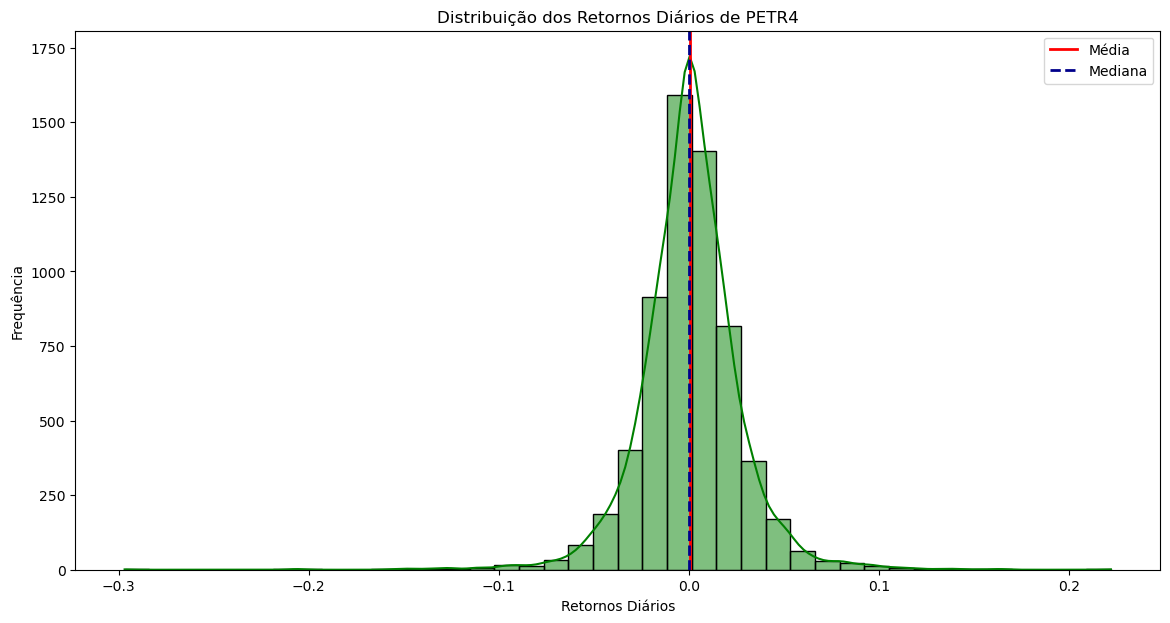

In [54]:
# Plotando a distribuição dos retornos com a linha de densidade ajustada
plt.figure(figsize=(14, 7))
sns.histplot(retornos_petr, kde=True, color='green', bins=40)
plt.axvline(np.mean(retornos_petr), color='red', linestyle='-', linewidth=2, label='Média')
plt.axvline(np.median(retornos_petr), color='darkblue', linestyle='--', linewidth=2, label='Mediana')
plt.title('Distribuição dos Retornos Diários de PETR4')
plt.xlabel('Retornos Diários')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Curtose

In [55]:
stats.kurtosis(retornos_petr, fisher=True)

8.009022600574658

Neste resultado, o valor da curtose '8.007' é bastante alto. Isso indica que a distribuição dos retornos diários de PETR4 tem caudas mais pesadas do que a distribuição normal, sugerindo a presença de outliers mais extremos e, portanto, um risco potencialmente maior. Essa alta curtose reflete a maior probabilidade de valores extremos, o que é importante para entendermos o risco associado.

Gerando amostras de curtose e calculando sua média

In [56]:
curtose_amostras = [stats.kurtosis(np.random.normal(size=len(retornos_petr)), fisher=True) for _ in range(1000)]

In [57]:
media_curtose_amostras = np.mean(curtose_amostras)

Este gráfico nos mostra a distribuição da curtose das amostras geradas.  
Essa análise ajuda a entender a robustez dos dados em termos de valores extremos.  
A linha vertical vermelha representa a curtose média, permitindo-nos ver a variabilidade e a tendência central das amostras.  


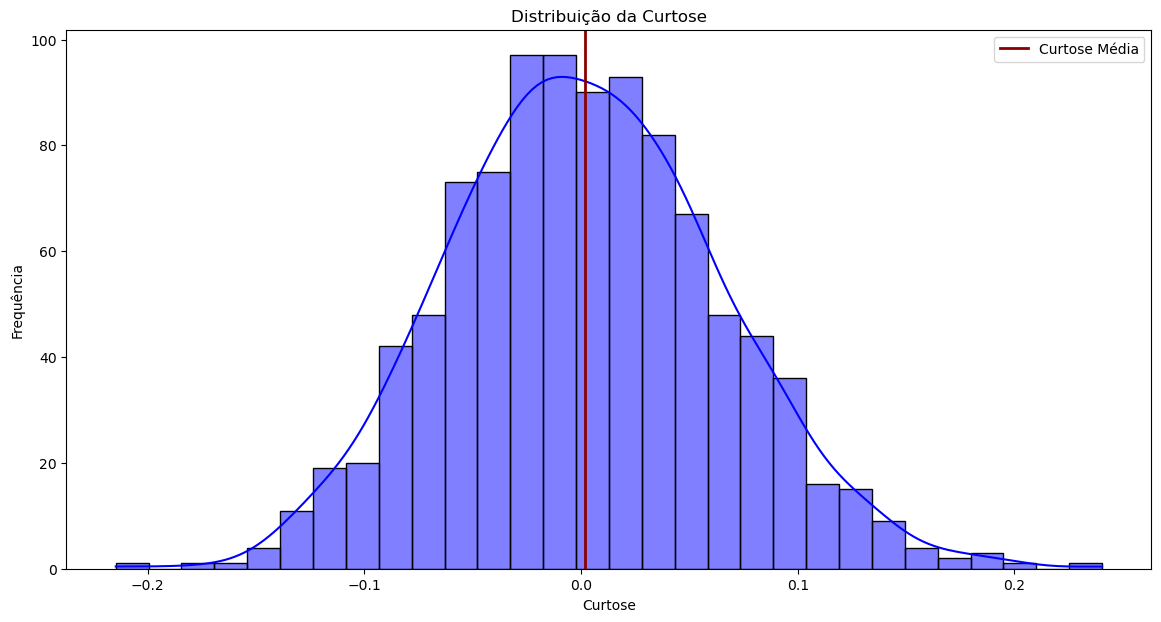

In [58]:
plt.figure(figsize=(14, 7))
sns.histplot(curtose_amostras, kde=True, color='blue', bins=30)
plt.axvline(media_curtose_amostras, color='darkred', linestyle='-', linewidth=2, label='Curtose Média')
plt.title('Distribuição da Curtose')
plt.xlabel('Curtose')
plt.ylabel('Frequência')
plt.legend()
plt.show()

#### **Teste de normalidade (Shapiro-Wilk)**

Problema:  
Um analista precisa verificar se os retornos diários da ação PETR4 seguem uma distribuição normal, pois muitos modelos estatísticos assumem essa premissa.  

Solução:  
O código realiza o teste de Shapiro-Wilk para avaliar a normalidade dos retornos diários de PETR4. O resultado indica que a hipótese nula de normalidade é rejeitada, ou seja, os retornos não seguem uma distribuição normal. Essa informação é importante para o analista escolher modelos estatísticos mais adequados, que não dependam da premissa de normalidade.

O teste de Shapiro-Wilk avalia se os dados seguem uma distribuição normal.

In [59]:
amostra_retornos = np.random.choice(retornos_petr, size=5000, replace=False)

shapiro_stat, shapiro_p = stats.shapiro(amostra_retornos)
print(f'Teste de Shapiro-Wilk: Stat={shapiro_stat}, p-valor={shapiro_p}')
if shapiro_p < 0.05:
    print('A hipótese nula de normalidade é rejeitada.')
else:
    print('A hipótese nula de normalidade não pode ser rejeitada.')


# O teste de Shapiro-Wilk foi realizado em uma amostra aleatória de 5000 retornos para evitar imprecisões devido ao tamanho da amostra original ser maior que 5000.
# Os resultados mostram Stat=..., p-valor=..., indicando se a hipótese nula de normalidade pode ou não ser rejeitada.


Teste de Shapiro-Wilk: Stat=0.9322020224195378, p-valor=6.7755637765375345e-43
A hipótese nula de normalidade é rejeitada.


Com este resultado, a hipótese nula de normalidade é rejeitada, indicando que os retornos diários de PETR4 não seguem uma distribuição normal. 
No entanto, deve-se considerar que para N > 5000, o p-valor pode não ser preciso, sendo necessário outro tipo de comparação.

#### **Log Normal**

Problema:  
O gestor de fundos observa que a ação PETR4 apresenta uma cauda à direita mais longa em sua distribuição de retornos positivos, indicando a possibilidade de eventos extremos positivos. Ele precisa quantificar a probabilidade desses eventos para gerenciar o risco da carteira.  

Solução:  
Ao ajustar a distribuição log-normal aos retornos positivos da ação PETR4, o gestor de fundos pode calcular a probabilidade de ocorrência de diferentes níveis de retornos positivos. Especificamente, ele pode calcular a probabilidade de a ação apresentar retornos acima de um determinado nível, por exemplo 10%, usando a função de densidade de probabilidade (PDF) da distribuição log-normal.

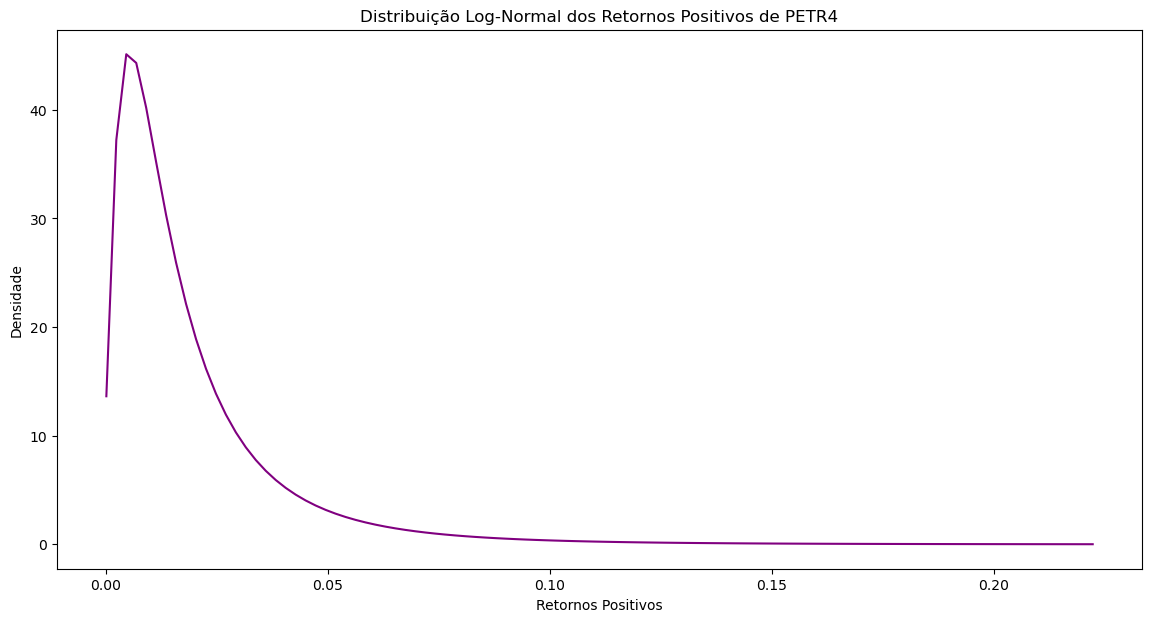

In [60]:
shape, loc, scale = stats.lognorm.fit(retornos_petr[retornos_petr > 0])
lognorm_dist = stats.lognorm(s=shape, loc=loc, scale=scale)

x = np.linspace(np.min(retornos_petr[retornos_petr > 0]), np.max(retornos_petr), 100)
plt.figure(figsize=(14, 7))
plt.plot(x, lognorm_dist.pdf(x), color='purple')
plt.title('Distribuição Log-Normal dos Retornos Positivos de PETR4')
plt.xlabel('Retornos Positivos')
plt.ylabel('Densidade')
plt.show()


A distribuição log-normal foi ajustada aos retornos positivos de PETR4.  
Este tipo de distribuição é útil para modelar dados que são positivos e têm uma cauda à direita mais longa.  
A visualização da distribuição log-normal nos ajuda a entender melhor a probabilidade dos retornos positivos e sua variação.

#### **Relatórios em Sweetviz**

In [61]:
report = sv.analyze(pd.DataFrame({'retornos': retornos_petr, 'dividendos': dy_petr4['Dividends'], 'DY': dy_petr4['DY']}))
report.show_html('RelatorioMF.html')

                                             |          | [  0%]   00:00 -> (? left)

Report RelatorioMF.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


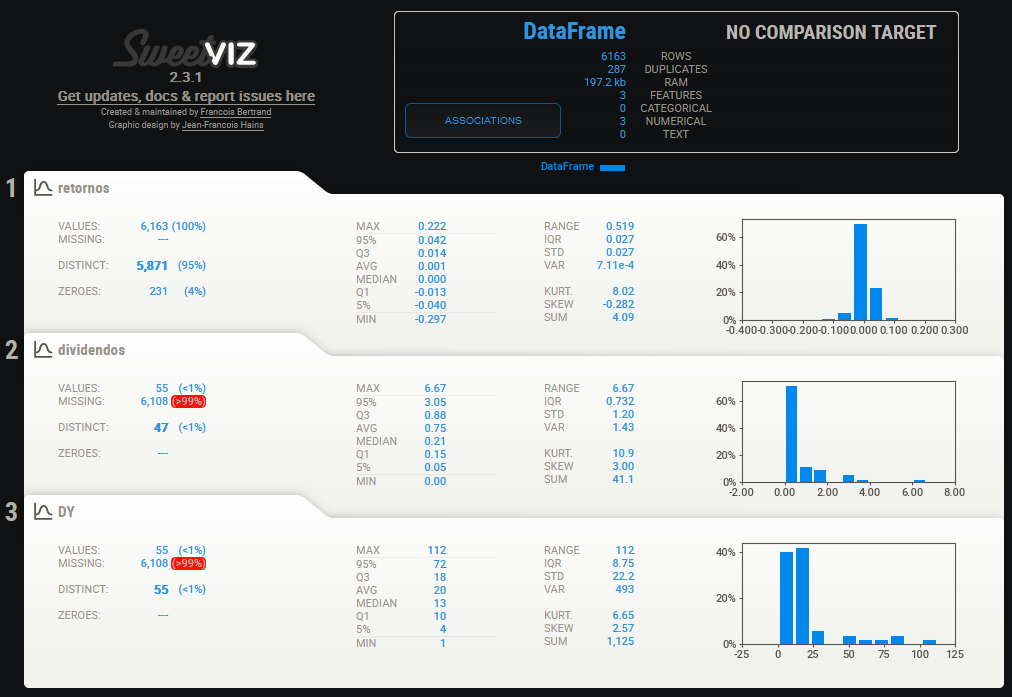